# Load Libraries

In [3]:
!pip install torchcde

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 5.5 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import os

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Read mat files
import scipy.io

# For NCDE
import torch
import torchcde

# Other
import math

# Load Data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data_path = "/content/drive/MyDrive/Grad_Stuff/Masters/Research Thesis/data/bacteria/"

In [7]:
autophos = pd.read_csv(os.path.join(data_path, "autophos_DL_EL_2017.csv"))
dephos = pd.read_csv(os.path.join(data_path, "dephospho_rust_2007.csv"))

In [32]:
hare_path = "/content/drive/MyDrive/Grad_Stuff/Masters/Research Thesis/data/lotka_volterra_lynx/"

hare = pd.read_csv(os.path.join(hare_path, "hudson-bay-lynx-hare.csv"))

## Peek

In [8]:
dephos.Time.unique()

array([ 0.     ,  1.     ,  2.83333,  3.83333,  4.83333,  5.83   ,
        6.83   ,  7.83   ,  8.83   ,  9.83   , 10.83   , 11.83   ,
       12.83   , 13.83   , 14.83   , 15.83   , 17.83   , 18.83   ,
       20.83   , 22.83   , 23.83   ])

In [9]:
autophos

,ind,D,T,S,U,rxn,clean_time,real_time,KaiA,ATP,Temp,KaiC
0,r1_0,0.069135,0.045399,1.678868,98.206598,r1,0,0.000000,0.375,100,30,3.50
1,r1_1,0.697227,4.525235,4.782960,89.994578,r1,1,1.000000,0.375,100,30,3.50
2,r1_2,1.196453,6.720664,5.305223,86.777660,r1,2,2.000000,0.375,100,30,3.50
3,r1_3,2.052489,8.442819,6.426792,83.077900,r1,3,3.500000,0.375,100,30,3.50
4,r1_4,1.558885,8.585833,6.082250,83.773031,r1,4,4.500000,0.375,100,30,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...
155,half1_3,17.001069,45.908086,8.947023,28.143822,half1,3,3.500000,1.500,100,30,1.75
156,half1_4,22.325297,45.361119,11.082416,21.231169,half1,4,4.500000,1.500,100,30,1.75
157,half1_6,30.574159,44.913467,9.700987,14.811387,half1,6,6.966667,1.500,100,30,1.75
158,half1_10,35.470827,34.873061,15.845843,13.810269,half1,10,10.216667,1.500,100,30,1.75


In [ ]:
dephos

,Unnamed: 0,Time,D,T,S,U,KaiC,ATP
0,0,0.00000,32.07453,23.22583,16.23466,28.46498,3.4,100
1,1,1.00000,25.80237,16.70902,21.49400,35.99461,3.4,100
2,2,2.83333,13.00753,9.26314,30.61895,47.11038,3.4,100
3,3,3.83333,9.46043,7.18825,32.13949,51.21184,3.4,100
4,4,4.83333,7.84428,6.07957,31.78975,54.28640,3.4,100
5,5,5.83000,5.02651,4.42007,30.17948,60.37395,3.4,100
6,6,6.83000,4.06086,2.83945,29.52165,63.57804,3.4,100
7,7,7.83000,3.54522,4.19358,25.56270,66.69850,3.4,100
8,8,8.83000,2.93466,3.25736,24.27179,69.53619,3.4,100
9,9,9.83000,2.65099,2.18048,22.66057,72.50796,3.4,100


# Exploratory Analyses

## Summary Statistics

In [ ]:
autophos.describe()

,D,T,S,U,clean_time,real_time,KaiA,ATP,Temp,KaiC
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.0,160.000000
mean,15.036224,22.436594,10.229872,52.297309,4.750000,5.054167,2.568750,50.500000,30.0,3.587500
std,14.342999,14.871033,6.517234,30.131158,4.036002,4.137882,1.970089,40.960174,0.0,0.873347
min,0.061390,0.045399,0.141678,2.853153,0.000000,0.000000,0.375000,10.000000,30.0,1.750000
25%,1.989002,6.387289,5.247377,26.255204,1.750000,1.750000,0.750000,10.000000,30.0,3.500000
50%,10.908354,24.323275,9.312941,47.422584,3.500000,4.000000,1.500000,25.000000,30.0,3.500000
75%,23.902605,34.862186,14.286194,85.305731,7.000000,7.779167,4.500000,100.000000,30.0,3.500000
max,55.795508,51.942177,30.321727,98.633730,12.000000,12.250000,6.000000,100.000000,30.0,7.000000


In [ ]:
dephos.describe()

,Unnamed: 0,Time,D,T,S,U,KaiC,ATP
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,2.100000e+01,21.0
mean,10.000000,11.227619,6.109262,4.916422,18.780892,70.193425,3.400000e+00,100.0
std,6.204837,7.054991,8.207520,5.475639,8.724664,17.990249,4.550560e-16,0.0
min,0.000000,0.000000,1.277560,1.665750,6.769900,28.464980,3.400000e+00,100.0
25%,5.000000,5.830000,1.909230,2.129080,11.787800,60.373950,3.400000e+00,100.0
50%,10.000000,10.830000,2.650990,2.678130,16.421820,77.736160,3.400000e+00,100.0
75%,15.000000,15.830000,5.026510,4.420070,25.562700,83.782320,3.400000e+00,100.0
max,20.000000,23.830000,32.074530,23.225830,32.139490,90.061480,3.400000e+00,100.0


## `autophos` Distributions

In [ ]:
autophos['real_time'].unique()

array([ 0.        ,  1.        ,  2.        ,  3.5       ,  4.5       ,
        6.96666667, 10.21666667, 12.25      ])

In [ ]:
autophos['clean_time'].unique()

array([ 0,  1,  2,  3,  4,  6, 10, 12])

<Axes: xlabel='D', ylabel='Count'>

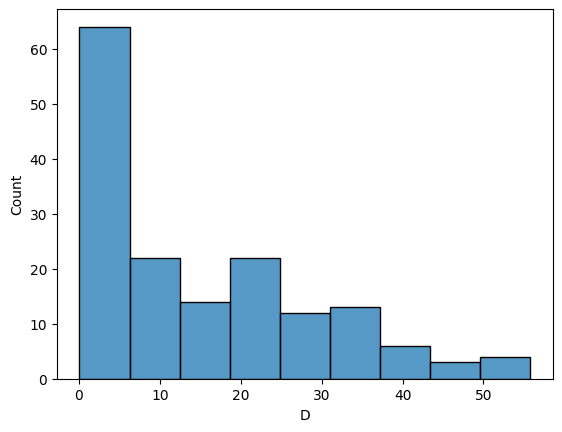

In [ ]:
sns.histplot(autophos['D'])

<Axes: xlabel='S', ylabel='Count'>

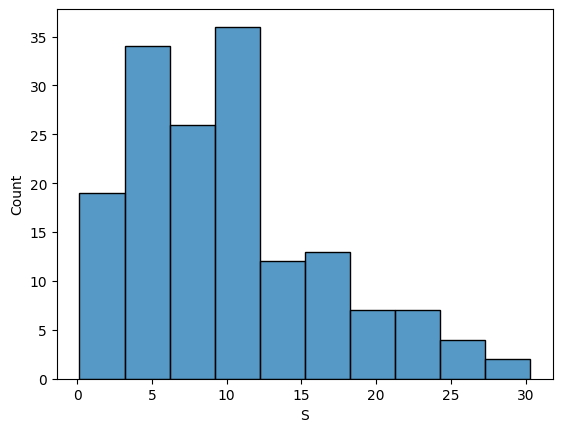

In [ ]:
sns.histplot(autophos['S'])

<Axes: xlabel='T', ylabel='Count'>

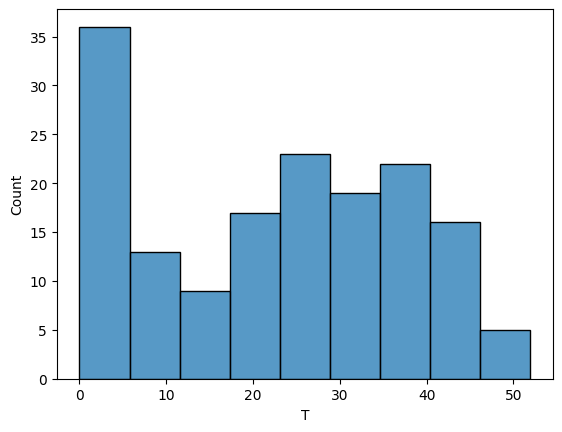

In [ ]:
sns.histplot(autophos['T'])

<Axes: xlabel='KaiA', ylabel='Count'>

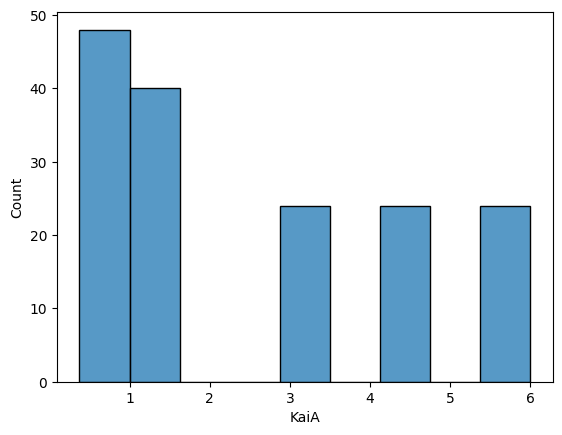

In [ ]:
sns.histplot(autophos['KaiA'])

<Axes: xlabel='KaiC', ylabel='Count'>

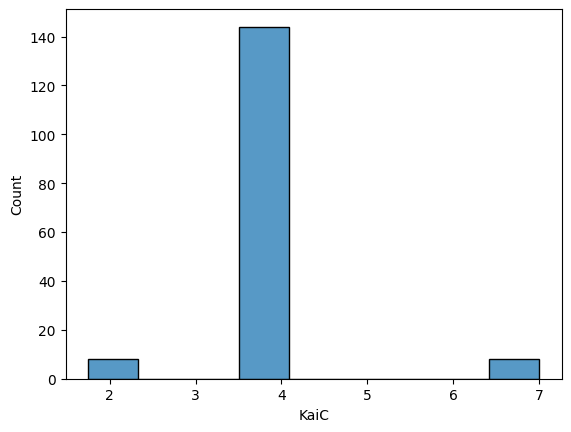

In [ ]:
sns.histplot(autophos['KaiC'])

<Axes: xlabel='ATP', ylabel='Count'>

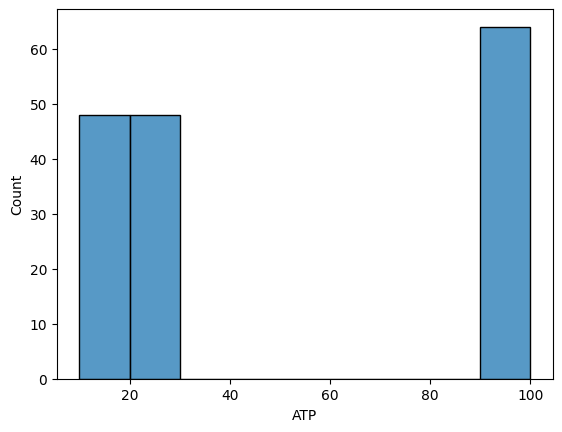

In [ ]:
sns.histplot(autophos['ATP'])

In [ ]:
autophos['Temp'].unique()

array([30])

## `dephos` Distributions

In [ ]:
dephos.head(5)

,Unnamed: 0,Time,D,T,S,U,KaiC,ATP
0,0,0.00000,32.07453,23.22583,16.23466,28.46498,3.4,100
1,1,1.00000,25.80237,16.70902,21.49400,35.99461,3.4,100
2,2,2.83333,13.00753,9.26314,30.61895,47.11038,3.4,100
3,3,3.83333,9.46043,7.18825,32.13949,51.21184,3.4,100
4,4,4.83333,7.84428,6.07957,31.78975,54.28640,3.4,100


In [ ]:
dephos['Time'].unique()

array([ 0.     ,  1.     ,  2.83333,  3.83333,  4.83333,  5.83   ,
        6.83   ,  7.83   ,  8.83   ,  9.83   , 10.83   , 11.83   ,
       12.83   , 13.83   , 14.83   , 15.83   , 17.83   , 18.83   ,
       20.83   , 22.83   , 23.83   ])

<Axes: xlabel='D', ylabel='Count'>

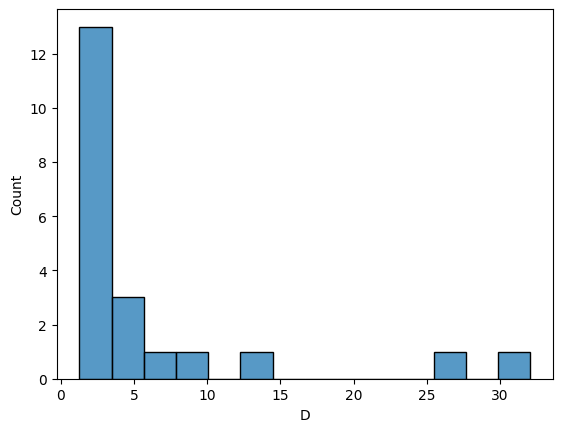

In [ ]:
sns.histplot(dephos['D'])

<Axes: xlabel='S', ylabel='Count'>

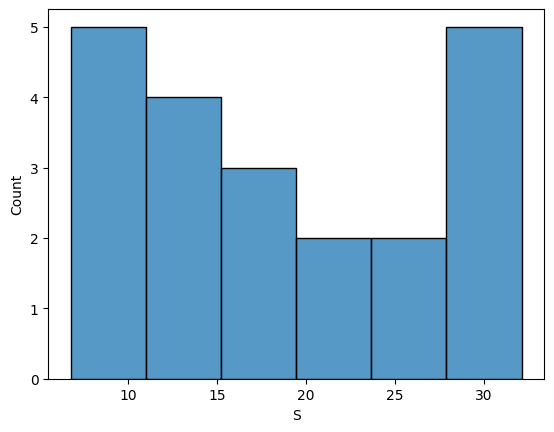

In [ ]:
sns.histplot(dephos['S'])

<Axes: xlabel='T', ylabel='Count'>

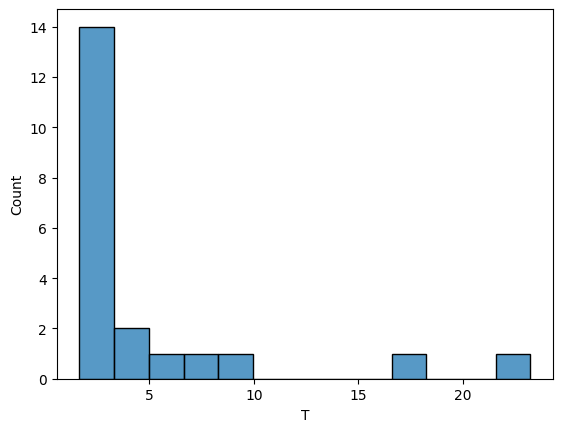

In [ ]:
sns.histplot(dephos['T'])

<Axes: xlabel='U', ylabel='Count'>

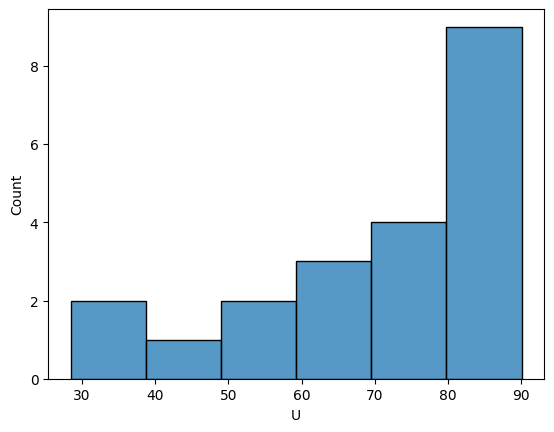

In [ ]:
sns.histplot(dephos['U'])

In [ ]:
dephos['KaiC'].unique()

array([3.4])

In [ ]:
dephos['ATP'].unique()

array([100])

# TorchCDE

### Template Code from Github [[Link](https://github.com/patrick-kidger/torchcde)]

In [7]:
# Create some data
batch, length, input_channels = 1, 10, 2
hidden_channels = 3

In [8]:
# Format data
batch, length, input_channels = 1, 10, 2
hidden_channels = 3
samp_t = torch.linspace(0, 1, length)
samp_t_ = samp_t.unsqueeze(0).unsqueeze(-1).expand(batch, length, 1)
samp_x_ = torch.rand(batch, length, input_channels - 1)
samp_x = torch.cat([samp_t_, samp_x_], dim=2)  # include time as a channel

# Interpolate it
coeffs = torchcde.hermite_cubic_coefficients_with_backward_differences(samp_x)
X = torchcde.CubicSpline(coeffs)

# Create the Neural CDE system
class F(torch.nn.Module):
    def __init__(self):
        super(F, self).__init__()
        self.linear = torch.nn.Linear(hidden_channels,
                                      hidden_channels * input_channels)

    def forward(self, t, z):
        return self.linear(z).view(batch, hidden_channels, input_channels)

func = F()
z0 = torch.rand(batch, hidden_channels)

# Integrate it
torchcde.cdeint(X=X, func=func, z0=z0, t=X.interval)

# Predator prey data and two-dim coupled predator data
# one dimension phos

tensor([[[ 0.3431,  0.5824,  0.3995],
         [ 0.5214, -0.0432,  0.9192]]], grad_fn=<PermuteBackward0>)

In [ ]:
X.interval

tensor([0., 9.])

### Template for `time_series_classification.py`

In [16]:
t = torch.linspace(0., 4 * math.pi, 100)
t

tensor([ 0.0000,  0.1269,  0.2539,  0.3808,  0.5077,  0.6347,  0.7616,  0.8885,
         1.0155,  1.1424,  1.2693,  1.3963,  1.5232,  1.6501,  1.7771,  1.9040,
         2.0309,  2.1579,  2.2848,  2.4117,  2.5387,  2.6656,  2.7925,  2.9195,
         3.0464,  3.1733,  3.3003,  3.4272,  3.5541,  3.6811,  3.8080,  3.9349,
         4.0619,  4.1888,  4.3157,  4.4427,  4.5696,  4.6965,  4.8235,  4.9504,
         5.0773,  5.2043,  5.3312,  5.4581,  5.5851,  5.7120,  5.8389,  5.9659,
         6.0928,  6.2197,  6.3467,  6.4736,  6.6005,  6.7275,  6.8544,  6.9813,
         7.1083,  7.2352,  7.3621,  7.4890,  7.6160,  7.7429,  7.8698,  7.9968,
         8.1237,  8.2506,  8.3776,  8.5045,  8.6314,  8.7584,  8.8853,  9.0122,
         9.1392,  9.2661,  9.3930,  9.5200,  9.6469,  9.7738,  9.9008, 10.0277,
        10.1546, 10.2816, 10.4085, 10.5354, 10.6624, 10.7893, 10.9162, 11.0432,
        11.1701, 11.2970, 11.4240, 11.5509, 11.6778, 11.8048, 11.9317, 12.0586,
        12.1856, 12.3125, 12.4394, 12.56

In [15]:
start = torch.rand(128) * 2 * math.pi
start

tensor([0.1534, 1.7135, 0.6473, 2.8151, 4.4637, 2.8506, 1.2574, 0.8157, 1.6220,
        6.2565, 0.9764, 3.1368, 5.6907, 2.1171, 1.0329, 5.7899, 0.0536, 5.6646,
        3.5090, 4.5157, 0.0285, 3.5149, 2.6265, 1.7128, 1.3165, 0.6979, 6.2578,
        5.6972, 3.4322, 3.6201, 0.7951, 3.4990, 3.2495, 3.1885, 1.4194, 3.4019,
        2.4802, 2.9190, 3.3134, 4.7622, 1.7236, 0.6822, 1.2911, 4.6334, 2.7341,
        3.6002, 2.3715, 1.1326, 0.3951, 5.4179, 5.9819, 5.4794, 5.6129, 2.9291,
        5.6543, 5.6677, 4.6453, 1.7424, 4.5621, 4.5459, 3.7389, 2.6311, 2.9772,
        6.1355, 5.9224, 2.3357, 0.4838, 6.0767, 0.0609, 4.4404, 3.5571, 2.9302,
        3.7690, 4.3120, 1.0467, 6.0264, 4.4557, 1.8512, 3.8156, 0.4795, 3.2310,
        6.0961, 0.5513, 3.2457, 2.0896, 5.0607, 0.5610, 0.5042, 0.2294, 5.3080,
        1.8333, 3.0928, 5.0896, 2.7532, 3.0696, 4.5535, 1.1192, 3.9677, 1.3429,
        3.2160, 0.4839, 1.1880, 0.5571, 2.2740, 3.2188, 0.6253, 3.6132, 5.6623,
        4.7670, 0.1885, 4.6251, 2.9072, 

In [18]:
start.unsqueeze(1).shape

torch.Size([128, 1])

In [19]:
t.unsqueeze(0).shape

torch.Size([1, 100])

In [27]:
torch.Tensor([1,2,3]).unsqueeze(0)

tensor([[1., 2., 3.]])

In [28]:
torch.Tensor([4, 5]).unsqueeze(1)

tensor([[4.],
        [5.]])

In [26]:
torch.Tensor([1,2,3]).unsqueeze(0) + torch.Tensor([4, 5]).unsqueeze(1)

tensor([[5., 6., 7.],
        [6., 7., 8.]])

In [21]:
(start.unsqueeze(1) + t.unsqueeze(0)).shape

torch.Size([128, 100])

In [ ]:
    x_pos = torch.cos(start.unsqueeze(1) + t.unsqueeze(0)) / (1 + 0.5 * t)

In [30]:
    t = torch.linspace(0., 4 * math.pi, 100)

    start = torch.rand(128) * 2 * math.pi
    x_pos = torch.cos(start.unsqueeze(1) + t.unsqueeze(0)) / (1 + 0.5 * t)
    x_pos[:64] *= -1
    y_pos = torch.sin(start.unsqueeze(1) + t.unsqueeze(0)) / (1 + 0.5 * t)
    x_pos += 0.01 * torch.randn_like(x_pos)
    y_pos += 0.01 * torch.randn_like(y_pos)
    ######################
    # Easy to forget gotcha: time should be included as a channel; Neural CDEs need to be explicitly told the
    # rate at which time passes. Here, we have a regularly sampled dataset, so appending time is pretty simple.
    ######################
    X = torch.stack([t.unsqueeze(0).repeat(128, 1), x_pos, y_pos], dim=2)
    y = torch.zeros(128)

In [33]:
y.shape

torch.Size([128])

### Re-format Data

In [42]:
r1 = autophos[autophos['rxn'] == 'r1']
r1

,ind,D,T,S,U,rxn,clean_time,real_time,KaiA,ATP,Temp,KaiC
0,r1_0,0.069135,0.045399,1.678868,98.206598,r1,0,0.000000,0.375,100,30,3.5
1,r1_1,0.697227,4.525235,4.782960,89.994578,r1,1,1.000000,0.375,100,30,3.5
2,r1_2,1.196453,6.720664,5.305223,86.777660,r1,2,2.000000,0.375,100,30,3.5
3,r1_3,2.052489,8.442819,6.426792,83.077900,r1,3,3.500000,0.375,100,30,3.5
4,r1_4,1.558885,8.585833,6.082250,83.773031,r1,4,4.500000,0.375,100,30,3.5
5,r1_6,3.870740,9.971949,11.235504,74.921807,r1,6,6.966667,0.375,100,30,3.5
6,r1_10,3.793106,8.620530,11.729384,75.856980,r1,10,10.216667,0.375,100,30,3.5
7,r1_12,1.385611,6.163030,11.624762,80.826598,r1,12,12.250000,0.375,100,30,3.5


In [ ]:
data = autophos[autophos['ind'].str.startswith('r1')]\
    [['D', 'T', 'S', 'U', 'KaiA', 'ATP', 'Temp', 'KaiC']]


In [37]:
data = autophos[autophos['ind'].str.startswith('r1')]\
    [['D', 'T', 'S', 'U', 'KaiA', 'ATP', 'Temp', 'KaiC']]


In [38]:
data.head()

,D,T,S,U,KaiA,ATP,Temp,KaiC
0,0.069135,0.045399,1.678868,98.206598,0.375,100,30,3.5
1,0.697227,4.525235,4.782960,89.994578,0.375,100,30,3.5
2,1.196453,6.720664,5.305223,86.777660,0.375,100,30,3.5
3,2.052489,8.442819,6.426792,83.077900,0.375,100,30,3.5
4,1.558885,8.585833,6.082250,83.773031,0.375,100,30,3.5


### Attempt 1

In [ ]:
input_channels

8

In [ ]:
data.shape

(80, 8)

In [ ]:
# Format data
batch = 1
length = data.shape[0]
input_channels = data.shape[1]
hidden_channels = 3

t = torch.linspace(0, 1, length)
t_ = t.unsqueeze(0).unsqueeze(-1)
x_ = torch.from_numpy(data.to_numpy().astype(np.float32)).unsqueeze(0)
x = torch.cat([t_, x_], dim=2)  # include time as a channel

In [ ]:
input_channels

8

In [ ]:
x.shape

torch.Size([1, 80, 9])

In [ ]:
X.interval

tensor([ 0., 79.])

In [ ]:
input_channels

8

In [ ]:
z0.shape

torch.Size([1, 3])

In [ ]:
# Interpolate it
coeffs = torchcde.hermite_cubic_coefficients_with_backward_differences(x)
X = torchcde.CubicSpline(coeffs)

# Create the Neural CDE system
class F(torch.nn.Module):
    def __init__(self, input_channels, hidden_channels):

        print(f"Input: {input_channels}; Hidden: {hidden_channels}")
        super(F, self).__init__()
        self.linear = torch.nn.Linear(hidden_channels,
                                      hidden_channels * input_channels)

    def forward(self, t, z):
        return self.linear(z).view(batch, hidden_channels, input_channels)

func = F(x.shape[-1], hidden_channels)
z0 = torch.rand(batch, hidden_channels)

# Integrate it
torchcde.cdeint(X=X, func=func, z0=z0, t=X.interval)

Input: 9; Hidden: 3


RuntimeError: shape '[1, 3, 8]' is invalid for input of size 27

## Attempt 2

### Data Subsetting

In [68]:
r1 = autophos[autophos['ind'].str.startswith('r1')]\
    [['real_time', 'D', 'T', 'S', 'U', 'KaiA', 'ATP', 'Temp', 'KaiC']]
r1_feat = r1[['D', 'T', 'S', 'U', 'KaiA', 'ATP', 'Temp']]
r1_resp = r1[['KaiC']]

In [20]:
r1.head()

,real_time,D,T,S,U,KaiA,ATP,Temp,KaiC
0,0.0,0.069135,0.045399,1.678868,98.206598,0.375,100,30,3.5
1,1.0,0.697227,4.525235,4.782960,89.994578,0.375,100,30,3.5
2,2.0,1.196453,6.720664,5.305223,86.777660,0.375,100,30,3.5
3,3.5,2.052489,8.442819,6.426792,83.077900,0.375,100,30,3.5
4,4.5,1.558885,8.585833,6.082250,83.773031,0.375,100,30,3.5


### Simulation

In [21]:
auto_t = np.array(60. * 60. * r1.real_time)

In [23]:
fine_dt = 60
auto_t = np.arange(auto_t[0], auto_t[-1]+fine_dt, fine_dt)

In [25]:
# extract ATP, KaiA
rxn_ATP = r1.ATP.iloc[0] / 100.; rxn_KaiA = r1.KaiA.iloc[0]
# divide KaiA by 2 if specified in model
# if mod.div_KaiA_by_2:
rxn_KaiA /= 2.


In [26]:
rxn_ATP

1.0

In [27]:
rxn_KaiA

0.1875

In [28]:
rxn_temp = r1.Temp.iloc[0] + 273.15

In [16]:
def simulate_autophos(subdat, q, mod, do_pool, fine_int=False, fine_dt=60):
   	# subdat is a subset of an experiment data table with a certain (ATP, KaiA)
   	# condition, often called by
   	# 	subdat = autophos_table[autophos_table.rxn == rxn],
   	# where rxn is a unique code corresponding to an (ATP, KaiA) reaction.

    # convert hours to seconds
    auto_t = np.array(60.*60.*subdat.real_time)

    # (useful for plotting smooth trajectories)
    if fine_int:
        auto_t = np.arange(auto_t[0], auto_t[-1]+fine_dt, fine_dt)

    # extract ATP, KaiA
    rxn_ATP = subdat.ATP.iloc[0] / 100.; rxn_KaiA = subdat.KaiA.iloc[0]
    # divide KaiA by 2 if specifid in model
    if mod.div_KaiA_by_2:
        rxn_KaiA /= 2.

    # extract temperature (in Kelvin)
    rxn_temp= subdat.Temp.iloc[0] + 273.15

    # set initial conditions
    X0 = mod.draw_t0(q, rxn_KaiA)

    rates= mod.converter(q, rxn_ATP, rxn_temp)

    # integrate model
    derivative= lambda u, t: mod.d_dt(u, t, rates)
    solver= odespy.odepack.Lsoda(derivative, adams_or_bdf= ode_method, nsteps= nsteps)
    solver.set_initial_condition(X0)

    if do_pool:
        with stdout_redirected():
            try:
                time0= time()
                Xs, t= solver.solve(auto_t)
                time1= time()
            except:
                return False

            int_time= time1 - time0
    else:
        try:
            time0= time()
            Xs, t= solver.solve(auto_t)
            time1= time()
        except:
            return False

        int_time= time1 - time0

    return auto_t, Xs, int_time


,D,T,S,U,KaiA,ATP,Temp,KaiC
0,0.069135,0.045399,1.678868,98.206598,0.375,100,30,3.5
1,0.697227,4.525235,4.782960,89.994578,0.375,100,30,3.5
2,1.196453,6.720664,5.305223,86.777660,0.375,100,30,3.5
3,2.052489,8.442819,6.426792,83.077900,0.375,100,30,3.5
4,1.558885,8.585833,6.082250,83.773031,0.375,100,30,3.5
...,...,...,...,...,...,...,...,...
139,19.528488,28.668909,16.954555,34.848048,6.000,10,30,3.5
140,23.765686,26.519752,17.614484,32.100077,6.000,10,30,3.5
141,28.647818,20.301010,22.021708,29.029464,6.000,10,30,3.5
142,26.673305,16.694194,26.977299,29.655202,6.000,10,30,3.5


In [107]:
def get_data_circad(num_timepoints=100):
    r1_time = torch.tensor(r1.real_time.to_numpy())

    r1_feat_tensor = torch.tensor(r1_feat.to_numpy())
    r1_feat_trans = r1_feat_tensor.transpose(0, 1)

    r1_resp_tensor = torch.tensor(r1_resp.to_numpy())
    r1_resp_trans = r1_resp_tensor.transpose(0, 1)

    X = torch.stack([r1_time.unsqueeze(0).repeat(7, 1), r1_feat_trans], dim=2)
    y = torch.zeros(8)
    y[:4] = 1

    # t = torch.linspace(0., 4 * math.pi, num_timepoints)

    # start = torch.rand(128) * 2 * math.pi
    # x_pos = torch.cos(start.unsqueeze(1) + t.unsqueeze(0)) / (1 + 0.5 * t)
    # x_pos[:64] *= -1
    # y_pos = torch.sin(start.unsqueeze(1) + t.unsqueeze(0)) / (1 + 0.5 * t)
    # x_pos += 0.01 * torch.randn_like(x_pos)
    # y_pos += 0.01 * torch.randn_like(y_pos)
    ######################
    # Easy to forget gotcha: time should be included as a channel; Neural CDEs need to be explicitly told the
    # rate at which time passes. Here, we have a regularly sampled dataset, so appending time is pretty simple.
    ######################
    # X = torch.stack([t.unsqueeze(0).repeat(128, 1), x_pos, y_pos], dim=2)
    # y = torch.zeros(128)
    # y[:64] = 1

    perm = torch.randperm(7)
    X = X[perm].type(torch.DoubleTensor)
    y = y[perm].type(torch.DoubleTensor)

    ######################
    # X is a tensor of observations, of shape (batch=128, sequence=100, channels=3)
    # y is a tensor of labels, of shape (batch=128,), either 0 or 1 corresponding to anticlockwise or clockwise
    # respectively.
    ######################
    return X, y

In [108]:
X_cyan, y_cyan = get_data_circad()

In [112]:
y.type()

'torch.FloatTensor'

In [59]:
x_pos.shape

torch.Size([128, 10])

In [53]:
r1_time = torch.tensor(r1.real_time.to_numpy())
r1_time

tensor([ 0.0000,  1.0000,  2.0000,  3.5000,  4.5000,  6.9667, 10.2167, 12.2500,
         0.0000,  1.0000,  2.0000,  3.5000,  4.5000,  6.9667, 10.2167, 12.2500,
         0.0000,  1.0000,  2.0000,  3.5000,  4.5000,  6.9667, 10.2167, 12.2500,
         0.0000,  1.0000,  2.0000,  3.5000,  4.5000,  6.9667, 10.2167, 12.2500,
         0.0000,  1.0000,  2.0000,  3.5000,  4.5000,  6.9667, 10.2167, 12.2500,
         0.0000,  1.0000,  2.0000,  3.5000,  4.5000,  6.9667, 10.2167, 12.2500,
         0.0000,  1.0000,  2.0000,  3.5000,  4.5000,  6.9667, 10.2167, 12.2500,
         0.0000,  1.0000,  2.0000,  3.5000,  4.5000,  6.9667, 10.2167, 12.2500,
         0.0000,  1.0000,  2.0000,  3.5000,  4.5000,  6.9667, 10.2167, 12.2500,
         0.0000,  1.0000,  2.0000,  3.5000,  4.5000,  6.9667, 10.2167, 12.2500],
       dtype=torch.float64)

In [88]:
r1_feat_tensor = torch.tensor(r1_feat.to_numpy())
r1_feat_trans = r1_feat_tensor.transpose(0, 1)
r1_feat_tensor.shape

torch.Size([80, 7])

In [72]:
r1_resp_tensor = torch.tensor(r1_resp.to_numpy())
r1_resp_trans = r1_resp_tensor.transpose(0, 1)
r1_resp_trans.shape

torch.Size([1, 80])

In [89]:
X = torch.stack([r1_time.unsqueeze(0).repeat(7, 1), r1_feat_trans], dim=2)
X.shape

torch.Size([7, 80, 2])

In [50]:
t = torch.linspace(0., 4 * math.pi, 10)
start = torch.rand(128) * 2 * math.pi
x_pos = torch.cos(start.unsqueeze(1) + t.unsqueeze(0)) / (1 + 0.5 * t)
x_pos[:64] *= -1
y_pos = torch.sin(start.unsqueeze(1) + t.unsqueeze(0)) / (1 + 0.5 * t)
x_pos += 0.01 * torch.randn_like(x_pos)
y_pos += 0.01 * torch.randn_like(y_pos)
######################
# Easy to forget gotcha: time should be included as a channel; Neural CDEs need to be explicitly told the
# rate at which time passes. Here, we have a regularly sampled dataset, so appending time is pretty simple.
######################
X = torch.stack([t.unsqueeze(0).repeat(128, 1), x_pos, y_pos], dim=2)
y = torch.zeros(128)

NameError: name 'train_X' is not defined

In [123]:
######################
# So you want to train a Neural CDE model?
# Let's get started!
######################

import math
import torch
import torchcde


######################
# A CDE model looks like
#
# z_t = z_0 + \int_0^t f_\theta(z_s) dX_s
#
# Where X is your data and f_\theta is a neural network. So the first thing we need to do is define such an f_\theta.
# That's what this CDEFunc class does.
# Here we've built a small single-hidden-layer neural network, whose hidden layer is of width 128.
######################
class CDEFunc(torch.nn.Module):
    def __init__(self, input_channels, hidden_channels):
        ######################
        # input_channels is the number of input channels in the data X. (Determined by the data.)
        # hidden_channels is the number of channels for z_t. (Determined by you!)
        ######################
        super(CDEFunc, self).__init__()
        self.input_channels = input_channels
        self.hidden_channels = hidden_channels

        self.linear1 = torch.nn.Linear(hidden_channels, 128)
        self.linear2 = torch.nn.Linear(128, input_channels * hidden_channels)

    ######################
    # For most purposes the t argument can probably be ignored; unless you want your CDE to behave differently at
    # different times, which would be unusual. But it's there if you need it!
    ######################
    def forward(self, t, z):
        # z has shape (batch, hidden_channels)
        z = self.linear1(z)
        z = z.relu()
        z = self.linear2(z)
        ######################
        # Easy-to-forget gotcha: Best results tend to be obtained by adding a final tanh nonlinearity.
        ######################
        z = z.tanh()
        ######################
        # Ignoring the batch dimension, the shape of the output tensor must be a matrix,
        # because we need it to represent a linear map from R^input_channels to R^hidden_channels.
        ######################
        z = z.view(z.size(0), self.hidden_channels, self.input_channels)
        return z


######################
# Next, we need to package CDEFunc up into a model that computes the integral.
######################
class NeuralCDE(torch.nn.Module):
    def __init__(self, input_channels, hidden_channels, output_channels, interpolation="cubic"):
        super(NeuralCDE, self).__init__()

        self.func = CDEFunc(input_channels, hidden_channels)
        self.initial = torch.nn.Linear(input_channels, hidden_channels)
        self.readout = torch.nn.Linear(hidden_channels, output_channels)
        self.interpolation = interpolation

    def forward(self, coeffs):
        if self.interpolation == 'cubic':
            X = torchcde.CubicSpline(coeffs)
        elif self.interpolation == 'linear':
            X = torchcde.LinearInterpolation(coeffs)
        else:
            raise ValueError("Only 'linear' and 'cubic' interpolation methods are implemented.")

        ######################
        # Easy to forget gotcha: Initial hidden state should be a function of the first observation.
        ######################
        X0 = X.evaluate(X.interval[0])
        z0 = self.initial(X0)

        ######################
        # Actually solve the CDE.
        ######################
        z_T = torchcde.cdeint(X=X,
                              z0=z0,
                              func=self.func,
                              t=X.interval)

        ######################
        # Both the initial value and the terminal value are returned from cdeint; extract just the terminal value,
        # and then apply a linear map.
        ######################
        z_T = z_T[:, 1]
        pred_y = self.readout(z_T)
        return pred_y


######################
# Now we need some data.
# Here we have a simple example which generates some spirals, some going clockwise, some going anticlockwise.
######################
def get_data(num_timepoints=100):
    t = torch.linspace(0., 4 * math.pi, num_timepoints)

    start = torch.rand(128) * 2 * math.pi
    x_pos = torch.cos(start.unsqueeze(1) + t.unsqueeze(0)) / (1 + 0.5 * t)
    x_pos[:64] *= -1
    y_pos = torch.sin(start.unsqueeze(1) + t.unsqueeze(0)) / (1 + 0.5 * t)
    x_pos += 0.01 * torch.randn_like(x_pos)
    y_pos += 0.01 * torch.randn_like(y_pos)
    ######################
    # Easy to forget gotcha: time should be included as a channel; Neural CDEs need to be explicitly told the
    # rate at which time passes. Here, we have a regularly sampled dataset, so appending time is pretty simple.
    ######################
    X = torch.stack([t.unsqueeze(0).repeat(128, 1), x_pos, y_pos], dim=2)
    y = torch.zeros(128)
    y[:64] = 1

    perm = torch.randperm(128)
    X = X[perm]
    y = y[perm]

    ######################
    # X is a tensor of observations, of shape (batch=128, sequence=100, channels=3)
    # y is a tensor of labels, of shape (batch=128,), either 0 or 1 corresponding to anticlockwise or clockwise
    # respectively.
    ######################
    return X, y





def main(num_epochs=30):
    train_X, train_y = get_data_circad()
    train_X = train_X.to(torch.double)
    train_y = train_y.to(torch.double)

    print(f"train_x type: {train_X.dtype}")
    print(f"train_y type: {train_y.dtype}")

    ######################
    # input_channels=3 because we have both the horizontal and vertical position of a point in the spiral, and time.
    # hidden_channels=8 is the number of hidden channels for the evolving z_t, which we get to choose.
    # output_channels=1 because we're doing binary classification.
    ######################
    model = NeuralCDE(input_channels=3, hidden_channels=8, output_channels=1)
    optimizer = torch.optim.Adam(model.parameters())

    ######################
    # Now we turn our dataset into a continuous path. We do this here via Hermite cubic spline interpolation.
    # The resulting `train_coeffs` is a tensor describing the path.
    # For most problems, it's probably easiest to save this tensor and treat it as the dataset.
    ######################
    train_coeffs = torchcde.hermite_cubic_coefficients_with_backward_differences(train_X)

    train_dataset = torch.utils.data.TensorDataset(train_coeffs, train_y)
    train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32)
    for epoch in range(num_epochs):
        for batch in train_dataloader:
            batch_coeffs, batch_y = batch
            pred_y = model(batch_coeffs).squeeze(-1)
            loss = torch.nn.functional.binary_cross_entropy_with_logits(pred_y, batch_y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        print('Epoch: {}   Training loss: {}'.format(epoch, loss.item()))

    test_X, test_y = get_data_circad()
    test_coeffs = torchcde.hermite_cubic_coefficients_with_backward_differences(test_X)
    pred_y = model(test_coeffs).squeeze(-1)
    binary_prediction = (torch.sigmoid(pred_y) > 0.5).to(test_y.dtype)
    prediction_matches = (binary_prediction == test_y).to(test_y.dtype)
    proportion_correct = prediction_matches.sum() / test_y.size(0)
    print('Test Accuracy: {}'.format(proportion_correct))


if __name__ == '__main__':
    main()

train_x type: torch.float64
train_y type: torch.float64


RuntimeError: mat1 and mat2 must have the same dtype, but got Double and Float

## Attempt 3: Univariate Dataset

In [10]:
df_u_kaic = autophos[autophos['ind'].str.startswith('r1')]\
    [['U', 'KaiC']]

In [12]:
# Format data
batch = 1
length = df_u_kaic.shape[0]
input_channels = df_u_kaic.shape[1]
hidden_channels = 3

t = torch.linspace(0, 1, length)
t_ = t.unsqueeze(0).unsqueeze(-1)
x_ = torch.from_numpy(df_u_kaic.to_numpy().astype(np.float32)).unsqueeze(0)
x = torch.cat([t_, x_], dim=2)  # include time as a channel

# Interpolate it
coeffs = torchcde.hermite_cubic_coefficients_with_backward_differences(x)
X = torchcde.CubicSpline(coeffs)

# Create the Neural CDE system
class F(torch.nn.Module):
    def __init__(self, input_channels, hidden_channels):

        print(f"Input: {input_channels}; Hidden: {hidden_channels}")
        super(F, self).__init__()
        self.linear = torch.nn.Linear(hidden_channels,
                                      hidden_channels * input_channels)

    def forward(self, t, z):
        return self.linear(z).view(batch, hidden_channels, input_channels)

func = F(x.shape[-1], hidden_channels)
z0 = torch.rand(batch, hidden_channels)

# Integrate it
torchcde.cdeint(X=X, func=func, z0=z0, t=X.interval)

Input: 3; Hidden: 3


RuntimeError: shape '[1, 3, 2]' is invalid for input of size 9

## Attempt 4: Hare Dataset

In [34]:
 # Format data
batch = 1
length = hare.shape[0]
input_channels = hare.shape[1]
hidden_channels = 3

t = torch.linspace(0, 1, length)
t_ = t.unsqueeze(0).unsqueeze(-1)
x_ = torch.from_numpy(hare.to_numpy().astype(np.float32)).unsqueeze(0)
x = torch.cat([t_, x_], dim=2)  # include time as a channel

# Interpolate it
coeffs = torchcde.hermite_cubic_coefficients_with_backward_differences(x)
X = torchcde.CubicSpline(coeffs)

# Create the Neural CDE system
class F(torch.nn.Module):
    def __init__(self, input_channels, hidden_channels):

        print(f"Input: {input_channels}; Hidden: {hidden_channels}")
        super(F, self).__init__()
        self.linear = torch.nn.Linear(hidden_channels,
                                      hidden_channels * input_channels)

    def forward(self, t, z):
        return self.linear(z).view(batch, hidden_channels, input_channels)

func = F(x.shape[-1], hidden_channels)
z0 = torch.rand(batch, hidden_channels)

# Integrate it
torchcde.cdeint(X=X, func=func, z0=z0, t=X.interval)

Input: 4; Hidden: 3


RuntimeError: shape '[1, 3, 3]' is invalid for input of size 12